# 4.10 - Coding Etiquette & Excel Reporting

## Contents

1. Importing libraries and data set
2. Security implications
3. Comparing customer behavior by geographic region
    - 3.1 Creating a regional segmentation of data
    - 3.2 Determining difference in spending habits by region
4. Creating an exclusion flag for low-activity customers
    - 4.1 Excluding low-activity customers from the data
    - 4.2 Exporting new data with low-activity customers excluded
5. Customer profiling
    - 5.1 Creating age profile
    - 5.2 Creating income profile
    - 5.3 Creating number of dependents profile
    - 5.4 Creating goods profile
        - a. Customers with babies
        - b. Customers with pets
        - c. Customers who drink alcohol
6. Creating visualizations of profiles
    - 6.1 Age profile visualization
    - 6.2 Income profile visualization
    - 6.3 Family size profile visualization
    - 6.4 Customers with babies visualization
    - 6.5 Customers with pets visualization
    - 6.6 Customers who drink alcohol visualization
7. Aggregating customer profile
    - 7.1 Aggregating customer age profile
    - 7.2 Aggregating customer income profile
    - 7.3 Aggregating customer number of dependents profile
    - 7.4 Aggregating customers with babies profile
    - 7.5 Aggregating customers with pets profile
    - 7.6 Aggregating customers who drink alcohol profile
8. Comparing customer profiles with regions and departments
9. Exporting charts

## 1. Importing libraries and data set

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path variable
path = r'C:\Users\lisa_\02\2023 Instacart Basket Analysis'

In [3]:
#Importing instacart_merge data set
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 2. Security implications

Columns with Personally Identifiable Information (PII) have been removed from the data set (i.e. customer first name and last name columns). **Please note that this has already been addressed in the previous exercise by dropping the first name and last name columns.

In [4]:
# Check output
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,med_days,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Comparing customer behavior by geographic region

### 3.1 Creating a regional segmentation of data

In [5]:
# Check state column
instacart_merged['state'].value_counts(dropna = False).sort_index(ascending=True)

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [6]:
# Creating region lists
northeast = ['Alabama','Connecticut','Maine','Massachusetts','New Hampshire','New Jersey','New York','Pennsylvania','Rhode Island','Vermont']
midwest = ['Illinois','Indiana','Iowa','Kansas','Michigan','Minnesota','Missouri','Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']
south = ['Arkansas','Delaware','District of Columbia','Florida','Georgia','Kentucky','Louisiana','Maryland','Mississippi','North Carolina','Oklahoma','South Carolina','Tennessee','Texas','Virginia','West Virginia']
west = ['Alaska','Arizona','California','Colorado','Hawaii','Idaho','Montana','Nevada','New Mexico','Oregon','Utah','Washington','Wyoming']

In [7]:
# Assigning region lists to region column
instacart_merged.loc[instacart_merged['state'].isin(northeast), 'region'] = 'Northeast'
instacart_merged.loc[instacart_merged['state'].isin(midwest), 'region'] = 'Midwest'
instacart_merged.loc[instacart_merged['state'].isin(south), 'region'] = 'South'
instacart_merged.loc[instacart_merged['state'].isin(west), 'region'] = 'West'

In [8]:
# Check output
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,med_days,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast


In [9]:
# Distribution by region
instacart_merged['region'].value_counts(dropna = False)

South        10153882
West          8292913
Midwest       7597325
Northeast     6360739
Name: region, dtype: int64

In [10]:
# Check shape
instacart_merged.shape

(32404859, 32)

In [11]:
# Check columns
instacart_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_label             object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

### 3.2 Determining difference in spending habits by region

In [12]:
# Crossing regions with spending flag 
crosstab_spend = pd.crosstab(instacart_merged['region'], instacart_merged['spending_flag'], dropna = False)
crosstab_spend

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,121678,6239061
South,196238,9957644
West,160354,8132559


#### - The South has the most number of customers, the most number of high spenders but also has the most number of low spenders.

## 4. Creating an exclusion flag for low-activity customers

In [13]:
# Creating activity_flag for low-activity customers (customers with less than 5 orders)
instacart_merged.loc[instacart_merged['max_order'] <5, 'activity_flag'] = 'Low activity'
instacart_merged.loc[instacart_merged['max_order'] >=5, 'activity_flag'] = 'High activity'

In [14]:
# Check count of activity_flag column
instacart_merged['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [15]:
# Check output
instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity


### 4.1 Excluding low-activity customers from the data

In [16]:
# Creating new data set excluding low-activity customers
high_act_cust = instacart_merged[instacart_merged['activity_flag'] == 'High activity']

In [17]:
# Check output
high_act_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity


In [18]:
# Check shape
high_act_cust.shape

(30964564, 33)

### 4.2 Exporting new data with low-activity customers excluded

In [19]:
# Exporting new data set as a pickle file
high_act_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

## 5. Customer Profiling

In [20]:
# Renaming data set
customers = high_act_cust

In [21]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity


In [22]:
# Removing warning messages
pd.options.mode.chained_assignment = None

In [23]:
customers.shape

(30964564, 33)

### 5.1 Creating age profile

In [24]:
# Check age statistics
customers['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### Customer age profile:
1. Youth = Age 18-39
2. Middle-Age = Age 40-65
3. Senior = Age 65+

In [25]:
# Creating age profile flag
customers.loc[(customers['age'] >= 18) & (customers['age'] < 40), 'age_category'] = 'Youth'
customers.loc[(customers['age'] >= 40) & (customers['age'] < 65), 'age_category'] = 'Middle age'
customers.loc[customers['age'] >= 65, 'age_category'] = 'Senior'

In [26]:
# Check age_category column
customers['age_category'].value_counts()

Middle age    12103910
Youth         10665110
Senior         8195544
Name: age_category, dtype: int64

In [27]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth


In [28]:
# Check shape
customers.shape

(30964564, 34)

In [29]:
# Creating age_category and orders_day_of_week crosstab
crosstab_dow = pd.crosstab(customers['age_category'],customers['orders_day_of_week'],dropna = False)
crosstab_dow

orders_day_of_week,0,1,2,3,4,5,6
age_category,,,,,,,
Middle age,2301009,2112438,1583124,1431181,1415669,1576837,1683652
Senior,1566244,1417495,1065170,978350,956161,1066115,1146009
Youth,2041357,1881753,1376412,1260004,1253164,1390777,1461643


### 5.2 Creating income profile

In [30]:
# Check income statistics
customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### Customer income profile
    1. Low = less than $70K
2. Mid = $70K-$100K
3. Upper-Mid = $100K-$150K
4. High = more than $150K

In [31]:
# Creating income profile flag
customers.loc[customers['income']< 70000, 'income_category'] = 'Low'
customers.loc[(customers['income']>= 70000) & (customers['income']< 100000), 'income_category'] = 'Mid'
customers.loc[(customers['income']>= 100000) & (customers['income']< 150000), 'income_category'] = 'Upper mid'
customers.loc[customers['income']>= 150000, 'income_category'] = 'High'

In [32]:
# Check income_category column
customers['income_category'].value_counts()

Upper mid    10312127
Low           8520533
Mid           8236629
High          3895275
Name: income_category, dtype: int64

In [33]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_category,income_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low


In [34]:
# Check shape
customers.shape

(30964564, 35)

### 5.3 Creating number of dependents profile

In [35]:
# Check number of dependents statistics
customers['num_of_dependents'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_of_dependents, dtype: float64

#### Customer age profile: 
1. Small = 0 dependents
2. Mid = 1-2 dependents
3. Large = 3+ dependents

In [36]:
# Creating family size profile flag
customers.loc[customers['num_of_dependents'] == 0, 'family_size'] = 'Small'
customers.loc[(customers['num_of_dependents'] == 1) | (customers['num_of_dependents'] == 2), 'family_size'] = 'Mid'
customers.loc[customers['num_of_dependents'] > 2, 'family_size'] = 'Large'

In [37]:
# Check family_size column
customers['family_size'].value_counts()

Mid      15452367
Large     7772516
Small     7739681
Name: family_size, dtype: int64

In [38]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_category,income_category,family_size
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large


In [39]:
# Check shape
customers.shape

(30964564, 36)

In [40]:
# Creating marital_status and num_of_dependents crosstab
crosstab_fam = pd.crosstab(customers['marital_status'],customers['num_of_dependents'],dropna = False)
crosstab_fam

num_of_dependents,0,1,2,3
marital_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


### 5.4 Creating goods profile

In [41]:
# check output
dept

,Unnamed: 0,0
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
# Renaming columns
dept.rename(columns= {"Unnamed: 0": "department_id"}, inplace=True)
dept.rename(columns= {"0": "department"}, inplace=True)
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [43]:
# Creating a data dictionary
data_dict = dict(zip(dept["department_id"], dept["department"]))
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [44]:
# Combinining data sets
customers['department'] = customers['department_id'].map(data_dict)

In [45]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_category,income_category,family_size,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages


In [46]:
# Check shape
customers.shape

(30964564, 37)

<AxesSubplot: >

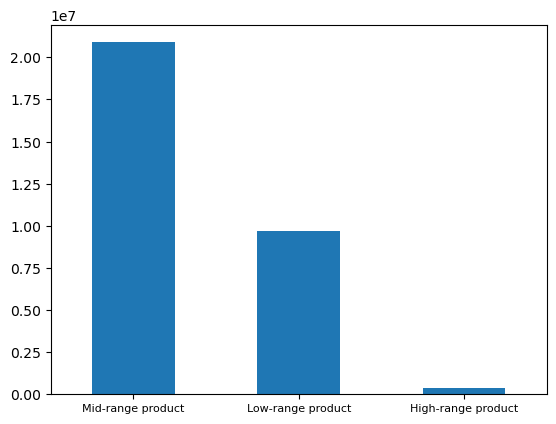

In [47]:
# Creating bar graph
price_range_bar = customers['price_label'].value_counts().plot.bar()
plt.xticks(rotation=0, fontsize = 8)
price_range_bar

### 5.4.a Customers with babies

In [48]:
# Creating babies column
customers.loc[high_act_cust['department'] == 'babies','babies'] = 'Have babies'
customers.loc[high_act_cust['department'] != 'babies','babies'] = 'No babies'

In [49]:
# Check babies count
customers['babies'].value_counts(dropna = False)

No babies      30554172
Have babies      410392
Name: babies, dtype: int64

In [50]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,num_of_dependents,marital_status,income,region,activity_flag,age_category,income_category,family_size,department,babies
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies


In [51]:
# Check shape
customers.shape

(30964564, 38)

### 5.4.b Customers with pets

In [52]:
# Creating pets column
customers.loc[high_act_cust['department'] == 'pets','pets'] = 'Have pets'
customers.loc[high_act_cust['department'] != 'pets','pets'] = 'No pets'

In [53]:
# Check pets count
customers['pets'].value_counts(dropna = False)

No pets      30871504
Have pets       93060
Name: pets, dtype: int64

In [54]:
# Check output
high_act_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,marital_status,income,region,activity_flag,age_category,income_category,family_size,department,babies,pets
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets


In [55]:
# Check shape
customers.shape

(30964564, 39)

### 5.4.c Customers who drink alcohol

In [56]:
# Creating alcohol column
customers.loc[high_act_cust['department'] == 'alcohol','alcohol'] = 'Alcohol drinker'
customers.loc[high_act_cust['department'] != 'alcohol','alcohol'] = 'Not an alcohol drinker'

In [57]:
# Check alcohol count
customers['alcohol'].value_counts(dropna = False)

Not an alcohol drinker    30819937
Alcohol drinker             144627
Name: alcohol, dtype: int64

In [58]:
# Check output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,activity_flag,age_category,income_category,family_size,department,babies,pets,alcohol
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker


In [59]:
# Check shape
customers.shape

(30964564, 40)

## 6. Creating visualizations of profiles

### 6.1 Age profile visualization

<AxesSubplot: >

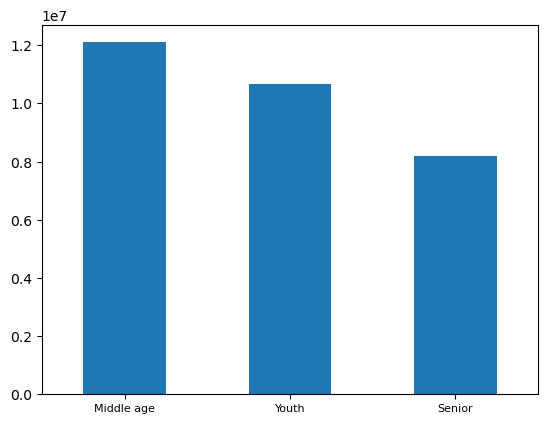

In [60]:
# Creating bar graph
age_bar = customers['age_category'].value_counts().plot.bar()
plt.xticks(rotation=0, fontsize = 8)
age_bar

Text(0.5, 0, 'Age Group')

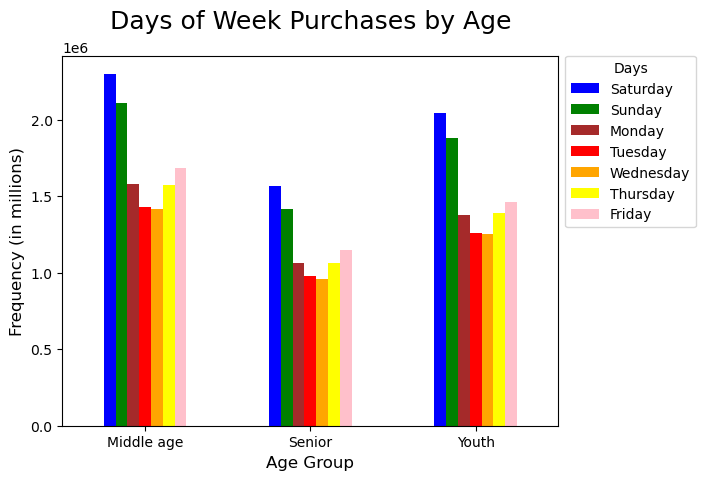

In [61]:
# Creating crosstab_dow visualization
dow_bar = crosstab_dow.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'brown', 'red', 'orange', 'yellow','pink'])
dow_bar.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Days of Week Purchases by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

### 6.1 Income profile visualization

<AxesSubplot: >

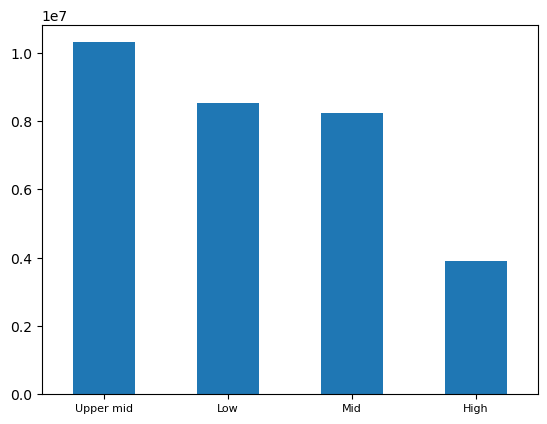

In [62]:
# Creating bar graph
income_bar = customers['income_category'].value_counts().plot.bar()
plt.xticks(rotation=0, fontsize = 8)
income_bar

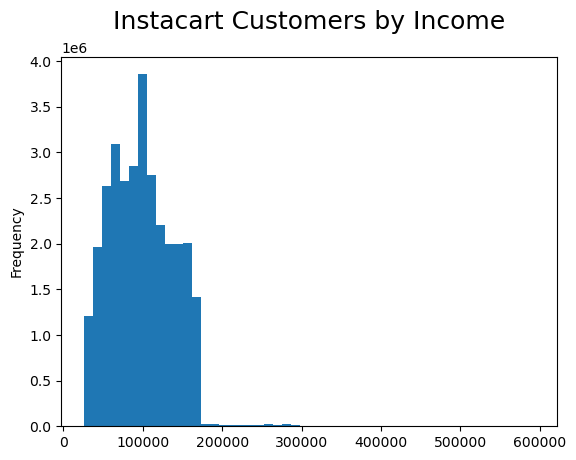

In [63]:
# Creating an income histogram
plt.title('Instacart Customers by Income', fontsize = 18, pad=20)
income_hist = customers['income'].plot.hist(bins = 50)

### 6.3 Family size profile visualization

<AxesSubplot: >

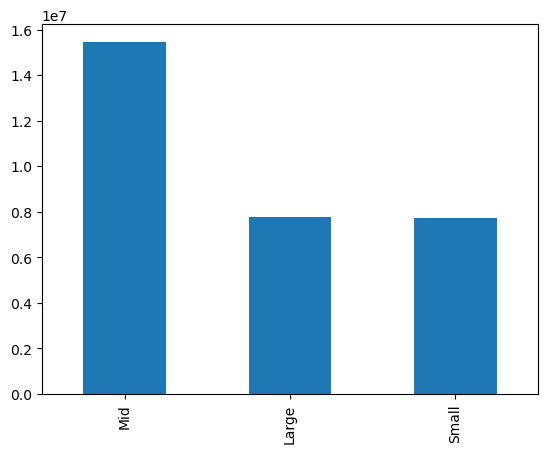

In [64]:
# Creating bar graph
family_size_bar = customers['family_size'].value_counts().plot.bar()
family_size_bar

(array([0, 1, 2, 3]),
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'divorced/widowed'),
  Text(3, 0, 'living with parents and siblings')])

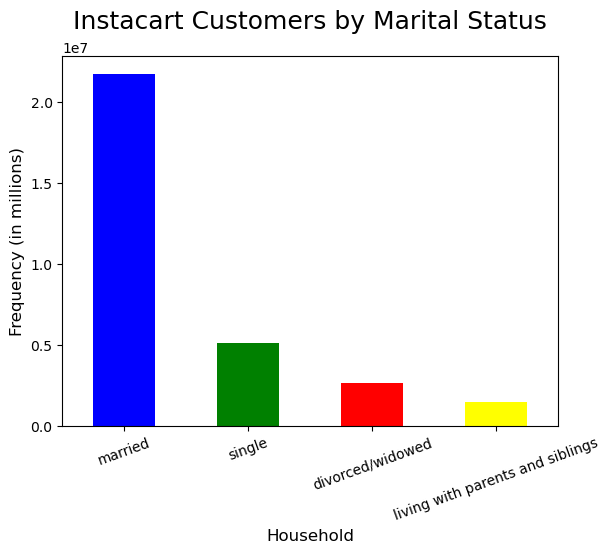

In [65]:
# Creating crosstab_fam visualization
marital_status_bar = customers['marital_status'].value_counts().plot.bar(color= ['blue', 'green', 'red', 'yellow'])
plt.title('Instacart Customers by Marital Status', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household',  fontsize = 12)
plt.xticks(rotation=20)

### 6.4 Customers with babies visualization

Text(0.5, 1.0, 'Customers with Babies')

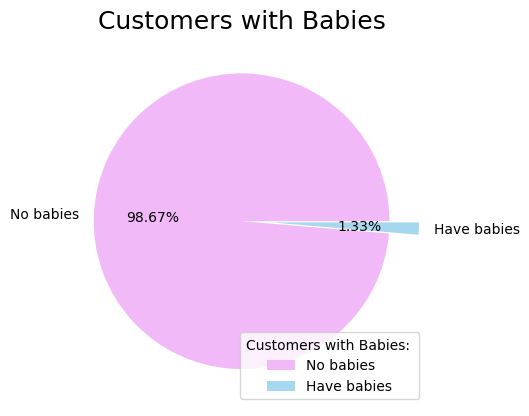

In [66]:
# Creating pie chart
babies_pie = customers['babies'].value_counts().plot.pie(labels = ['No babies','Have babies'], autopct=('%.2f%%'), colors = ['#f1b9f7', '#a5d8ef'], label = '', explode = [0,0.2])
babies_pie.legend(title = 'Customers with Babies: ', loc = 'lower right')
plt.title("Customers with Babies", fontsize = '18')

### 6.5 Customers with pets visualization

Text(0.5, 1.0, 'Customers with Pets')

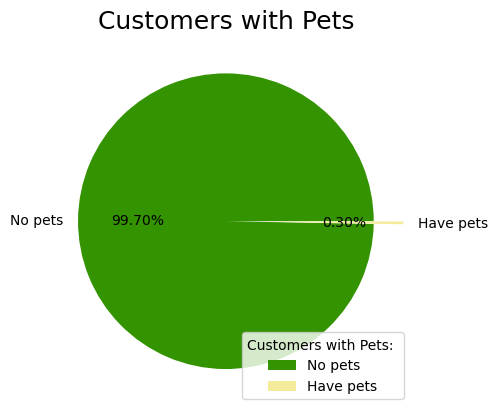

In [67]:
# Creating pie chart
pets_pie = customers['pets'].value_counts().plot.pie(labels = ['No pets','Have pets'], autopct=('%.2f%%'), colors = ['#349301', '#f4eb9a'], label = '', explode = [0,0.2])
pets_pie.legend(title = 'Customers with Pets: ', loc = 'lower right')
plt.title("Customers with Pets", fontsize = '18')

### 6.6 Customers who drink alcohol visualization

Text(0.5, 1.0, 'Customers who Drink Alcohol')

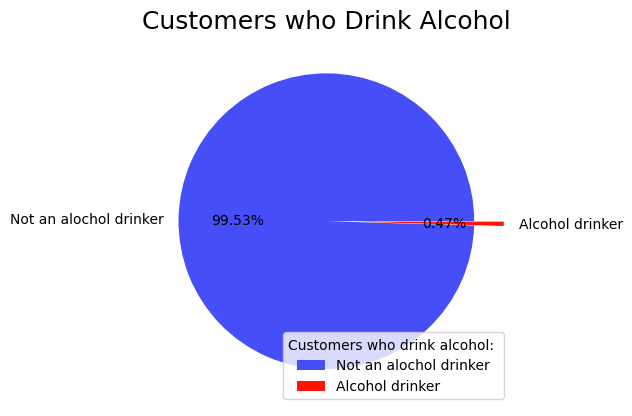

In [68]:
# Creating pie chart
alcohol_pie = customers['alcohol'].value_counts().plot.pie(labels = ['Not an alochol drinker','Alcohol drinker'], autopct=('%.2f%%'), colors = ['#454ef7', '#ff1500'], label = '', explode = [0,0.2])
alcohol_pie.legend(title = 'Customers who drink alcohol: ', loc = 'lower right')
plt.title("Customers who Drink Alcohol", fontsize = '18')

## 7. Aggregating customer profiles

### 7.1 Aggregating customer age profile

In [69]:
# Aggregating customer age profile for frequency
customers.groupby('age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
age_category                           
Middle age            8.354216   1  145
Senior                8.307779   1   99
Youth                 8.415515   1  109

In [70]:
# Aggregating customer age profile for expenditure
customers.groupby('age_category').agg({'prices': ['mean', 'min', 'max']})

prices              
                   mean  min      max
age_category                         
Middle age    11.944899  1.0  99999.0
Senior        11.757768  1.0  99999.0
Youth         12.055665  1.0  99999.0

### 7.2 Aggregating customer income profile

In [71]:
# Aggregating customer income profile for frequency
customers.groupby('income_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
income_category                           
High                     8.467190   1  121
Low                      7.965765   1  137
Mid                      8.528310   1  114
Upper mid                8.519941   1  145

In [72]:
# Aggregating customer income profile for expenditure
customers.groupby('income_category').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
income_category                         
High             32.615289  1.0  99999.0
Low               7.366964  1.0  14900.0
Mid               8.847132  1.0  99999.0
Upper mid        10.359624  1.0  99999.0

### 7.3 Aggregating customer number of dependents profile

In [73]:
# Aggregating customer income profile for frequency
customers.groupby('family_size').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
family_size                           
Large                8.375061   1  145
Mid                  8.370250   1  114
Small                8.336567   1  137

In [74]:
# Aggregating customer income profile for expenditure
customers.groupby('family_size').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
family_size                         
Large        11.791609  1.0  99999.0
Mid          11.920187  1.0  99999.0
Small        12.102657  1.0  99999.0

### 7.4 Aggregating customers with babies profile

In [75]:
# Aggregating customers with babies profile for frequency
customers.groupby('babies').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
babies                                
Have babies         10.577894   1   92
No babies            8.333289   1  145

In [76]:
# Aggregating customers with babies profile for expenditure
customers.groupby('babies').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
babies                              
Have babies   7.634399  1.0     15.0
No babies    11.991265  1.0  99999.0

### 7.5 Aggregating customers with pets profile

In [77]:
# Aggregating customers with pets profile for frequency
customers.groupby('pets').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                       mean min  max
pets                                
Have pets          7.736331   1  121
No pets            8.364928   1  145

In [78]:
# Aggregating customers with pets profile for expenditure
customers.groupby('pets').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
pets                              
Have pets   7.887489  1.0     15.0
No pets    11.945718  1.0  99999.0

### 7.6 Aggregating customers who drink alcohol profile

In [79]:
# Aggregating customers who drink alcohol profile for frequency
customers.groupby('alcohol').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order         
                                    mean min  max
alcohol                                          
Alcohol drinker                 5.444578   1   90
Not an alcohol drinker          8.376734   1  145

In [80]:
# Aggregating customers who drink alcohol profile for expenditure
customers.groupby('alcohol').agg({'prices': ['mean', 'min', 'max']})

prices              
                             mean  min      max
alcohol                                        
Alcohol drinker          8.150699  1.0     15.0
Not an alcohol drinker  11.951273  1.0  99999.0

## 8. Comparing customer profiles with regions and departments

Text(0.5, 0, 'Region')

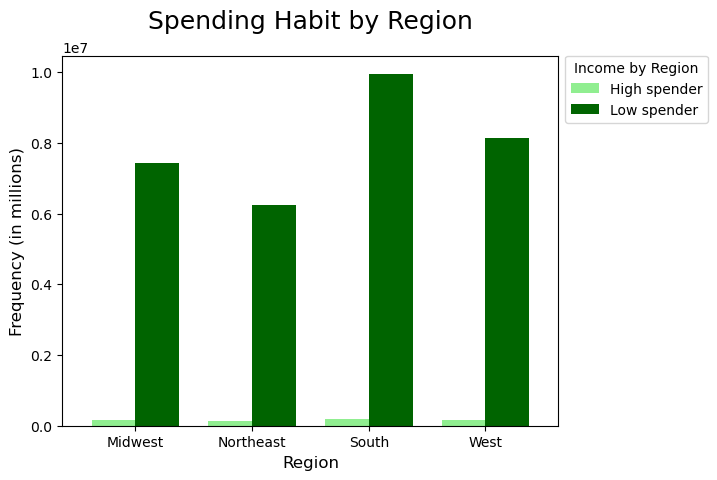

In [81]:
# Creating bar graph for spending habit by region
spend_bar = crosstab_spend.plot(kind = 'bar', rot = 0, color= ['lightgreen', 'darkgreen'], width = 0.75)
spend_bar.legend(title='Income by Region', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Spending Habit by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

#### - Most high spenders are in the South.

Text(0.5, 0, 'Age Group')

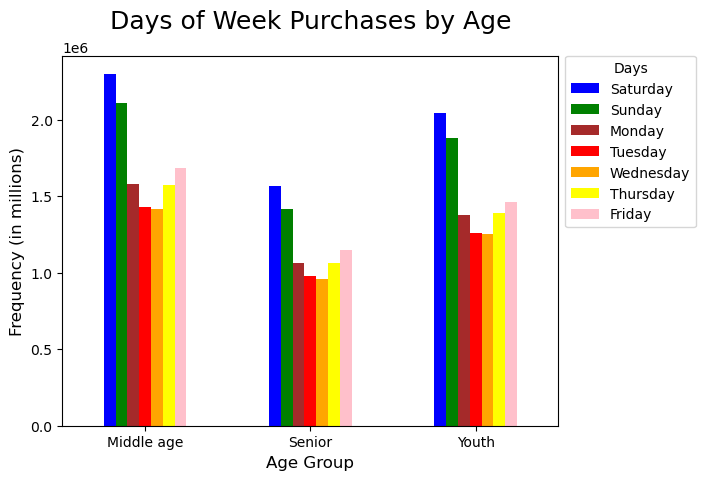

In [82]:
# Creating crosstab for days of week purchases by age
dow_bar = crosstab_dow.plot(kind = 'bar', rot = 0, color= ['blue', 'green', 'brown', 'red', 'orange', 'yellow','pink'])
dow_bar.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left', labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Days of Week Purchases by Age', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group',  fontsize = 12)

#### - Saturday is the busiest day of the week regardless of age group.

In [83]:
# Creating crosstab for customers with babies by region
crosstab_babies = pd.crosstab(customers['region'], customers['babies'], dropna = False)
crosstab_babies

babies,Have babies,No babies
region,,
Midwest,95741,7165772
Northeast,80596,5994798
South,131627,9568803
West,102428,7824799


Text(0.5, 0, 'Region')

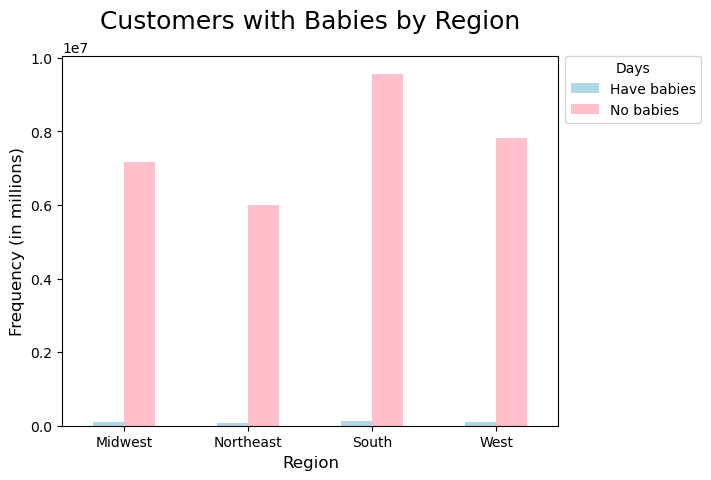

In [84]:
# Creating crosstab for customers with babies by region
babies_bar = crosstab_babies.plot(kind = 'bar', rot = 0, color=['lightblue','pink'])
babies_bar.legend(title='Days', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Customers with Babies by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Region',  fontsize = 12)

In [85]:
# Creating crossbar for department by region
cust_goods = pd.crosstab(customers['department'], customers['region'], dropna = False)
cust_goods

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,27586,46244,36754
babies,95741,80596,131627,102428
bakery,261753,220929,349991,288155
beverages,598979,514055,808293,650574
breakfast,156155,132160,208916,173619
bulk,7929,6355,10424,8743
canned goods,237459,196402,317992,260221
dairy eggs,1212490,1015353,1622279,1327060
deli,234464,197515,314503,257352


In [86]:
# Checking stats
cust_goods.describe()

region,Midwest,Northeast,South,West
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,3.457863e+05,2.893045e+05,4.619252e+05,3.774870e+05
std,5.016508e+05,4.183564e+05,6.697879e+05,5.472350e+05
min,7.929000e+03,6.355000e+03,1.042400e+04,8.581000e+03
25%,6.066600e+04,4.958100e+04,7.974600e+04,6.599800e+04
50%,1.669920e+05,1.384880e+05,2.161770e+05,1.782000e+05
75%,4.203340e+05,3.479720e+05,5.565130e+05,4.578860e+05
max,2.134115e+06,1.774328e+06,2.846152e+06,2.324678e+06


(-1.0, 22.0)

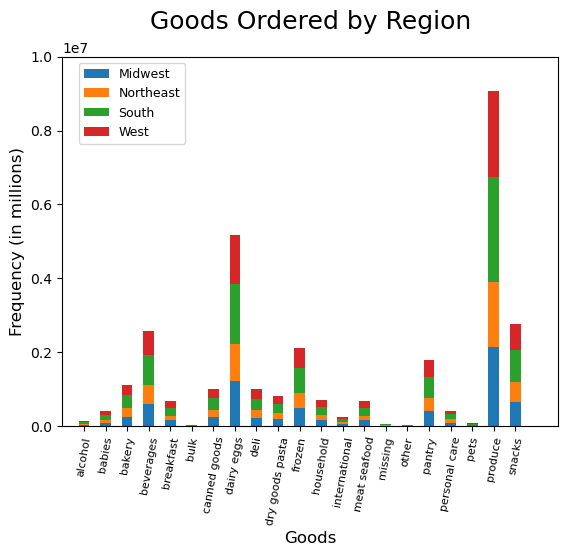

In [87]:
# Creating stacked bar for goods by region
goods_bar = cust_goods.plot(kind = 'bar', stacked = True)
goods_bar.legend(bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Midwest', 'Northeast', 'South', 'West'], fontsize = 9)
plt.title('Goods Ordered by Region', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Goods',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)
plt.ylim(0, 10000000)
plt.xlim(-1, 22)


#### - The top 3 goods ordered are produce, dairy eggs and snacks. The Southern region has the most orders for the same top goods.

In [88]:
# Creating crossbar for goods by loyalty flag
goods_loyalty = pd.crosstab(customers['department'], instacart_merged['loyalty_flag'], dropna = False)
goods_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


(-1.0, 22.0)

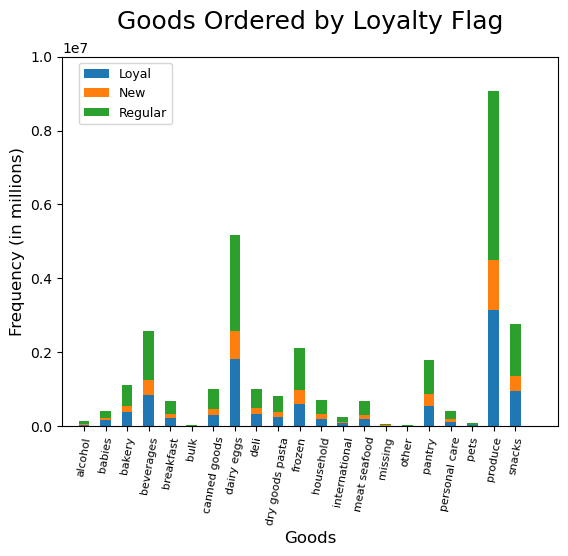

In [89]:
# Creating stacked bar for goods by loyalty flag
goods_loyalty_bar = goods_loyalty.plot(kind = 'bar', stacked = True)
goods_loyalty_bar.legend(bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Loyal', 'New', 'Regular'], fontsize = 9)
plt.title('Goods Ordered by Loyalty Flag', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Goods',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)
plt.ylim(0, 10000000)
plt.xlim(-1, 22)


In [90]:
# Creating order_time_category column
customers.loc[customers['order_hour_of_day'] <5 , 'order_time_category'] = 'Late'
customers.loc[(customers['order_hour_of_day']>= 9) & (customers['order_hour_of_day']<= 23), 'order_time_category'] = 'Regular'
customers.loc[(customers['order_hour_of_day']>= 5) & (customers['order_hour_of_day']< 9), 'order_time_category'] = 'Early'
customers['order_time_category'].value_counts(dropna = False)

Regular    27593897
Early       2887754
Late         482913
Name: order_time_category, dtype: int64

In [91]:
# Creating crosstab for goods and order_time_category
cust_time = pd.crosstab(customers['department'], customers['order_time_category'], dropna = False)
cust_time

order_time_category,Early,Late,Regular
department,,,
alcohol,7972,1356,135299
babies,50188,5009,355195
bakery,107807,16374,996647
beverages,231045,41112,2299744
breakfast,68714,9734,592402
bulk,3057,506,29888
canned goods,88259,16065,907750
dairy eggs,515309,75559,4586314
deli,88984,15308,899542


In [92]:
# Checking stats
cust_time.describe()

order_time_category,Early,Late,Regular
count,21.000000,21.000000,2.100000e+01
mean,137512.095238,22995.857143,1.313995e+06
std,204771.538901,33653.784406,1.898888e+06
min,3017.000000,506.000000,2.988800e+04
25%,21155.000000,4224.000000,2.306120e+05
50%,68714.000000,12128.000000,6.210900e+05
75%,156670.000000,30116.000000,1.595919e+06
max,865693.000000,145797.000000,8.067783e+06


(array([0, 1, 2]),
 [Text(0, 0, 'Regular'), Text(1, 0, 'Early'), Text(2, 0, 'Late')])

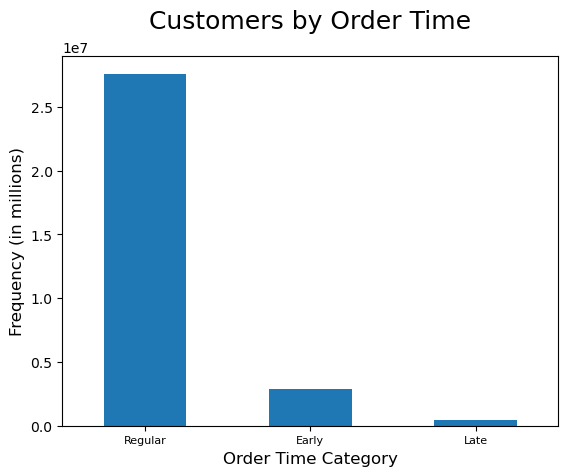

In [93]:
# Creating order time category bar chart
time_category_bar = customers['order_time_category'].value_counts().plot.bar()
plt.title('Customers by Order Time', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Order Time Category',  fontsize = 12)
plt.xticks(rotation=0, fontsize = 8)


(-1.0, 22.0)

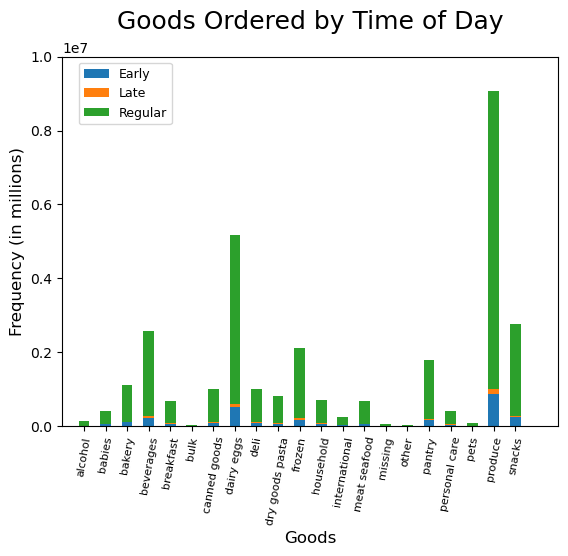

In [94]:
# Creating stacked bar for goods and order_time_category
time_bar = cust_time.plot(kind = 'bar', stacked = True)
time_bar.legend(bbox_to_anchor=(0.02, 1.0), loc='upper left', labels=['Early', 'Late', 'Regular'], fontsize = 9)
plt.title('Goods Ordered by Time of Day', fontsize = 18, pad=20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Goods',  fontsize = 12)
plt.xticks(rotation=80, fontsize = 8)
plt.ylim(0, 10000000)
plt.xlim(-1, 22)

#### - The most orders are ordered during regular hours and the top 3 goods ordered are produce, dairy and snacks.

In [95]:
# Checking output
customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,region,activity_flag,age_category,income_category,family_size,department,babies,pets,alcohol,order_time_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker,Early
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker,Early
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker,Regular
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker,Early
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Northeast,High activity,Youth,Low,Large,beverages,No babies,No pets,Not an alcohol drinker,Regular


## 9. Exporting charts

In [96]:
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))
dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_bar.png'))
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))
income_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_hist.png'))
family_size_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_size_bar.png'))
marital_status_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_status_bar.png'))
babies_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babies_pie.png'))
pets_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pets_pie.png'))
alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_pie.png'))
spend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spend_bar.png'))
babies_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'babies_bar.png'))
goods_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_bar.png'))
time_category_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_category_bar.png'))
time_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_bar.png'))
goods_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_loyalty_bar.png'))